<a href="https://colab.research.google.com/github/Plagistus/ML_Aufg03/blob/main/M05_Aufgabe3_Bildklassifikation_mit_Alexnet.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#pip install np_utils

In [ ]:
import keras
from keras.models import Sequential
from keras.layers import Dense, Activation, Dropout, Flatten,\
 Conv2D, MaxPooling2D
from keras.layers.normalization import BatchNormalization
import numpy as np
import seaborn as sns
import glob
import cv2

import os
from keras.preprocessing.image import ImageDataGenerator

from keras.utils.np_utils import to_categorical
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
import random
import matplotlib.pyplot as plt

import warnings

In [ ]:
#from google.colab import drive
#drive.mount('/content/drive')

In [ ]:
warnings.filterwarnings("ignore")

In [ ]:
#Sie müssen hier die Bilder selbst einfügen - colab kann die bilder leider nicht mit einspeichern daher benutzen wir einfach google drive
filelist_A = 'drive/MyDrive/ml/101_ObjectCategories/elephant/'
filelist_B = 'drive/MyDrive/ml/101_ObjectCategories/flamingo/'
filelist_D = 'drive/MyDrive/ml/101_ObjectCategories/dolphin/'
IMG_HEIGHT = 227
IMG_WIDTH = 227
dim = (IMG_WIDTH, IMG_HEIGHT)

In [ ]:
x_A_images = [x for x in sorted(os.listdir(filelist_A)) if x[-4:] == '.jpg']
x_A = np.empty((len(x_A_images), IMG_HEIGHT, IMG_WIDTH,3), dtype='float32') #dtype = bild
y_A = np.ones((x_A.shape[0],1))
print(x_A.shape)

(64, 227, 227, 3)


In [ ]:
for i, name in enumerate(x_A_images):
    im = cv2.imread(filelist_A + name, cv2.IMREAD_UNCHANGED)
    im = cv2.cvtColor(im, cv2.COLOR_BGR2RGB) 
    im = cv2.resize(im, dim, interpolation = cv2.INTER_AREA)
    im = cv2.normalize(im, None, norm_type=cv2.NORM_MINMAX)
    im = (im - np.min(im)) / (np.max(im) - np.min(im))
    x_A[i] = im

In [ ]:
x_B_images = [x for x in sorted(os.listdir(filelist_B)) if x[-4:] == '.jpg']
x_B = np.empty((len(x_B_images), IMG_HEIGHT, IMG_WIDTH,3), dtype='float32')
y_B = np.zeros((x_B.shape[0],1))
x_B.shape

(67, 227, 227, 3)

In [ ]:
y_B.shape

(67, 1)

In [ ]:
for i, name in enumerate(x_B_images):
    im = cv2.imread(filelist_B + name, cv2.IMREAD_UNCHANGED)
    im = cv2.cvtColor(im, cv2.COLOR_BGR2RGB) 
    im = cv2.resize(im, dim, interpolation = cv2.INTER_AREA)
    im = cv2.normalize(im, None, norm_type=cv2.NORM_MINMAX)
    im = (im - np.min(im)) / (np.max(im) - np.min(im))
    x_B[i] = im

In [ ]:
x_D_images = [x for x in sorted(os.listdir(filelist_D)) if x[-4:] == '.jpg']
x_D = np.empty((len(x_D_images), IMG_HEIGHT, IMG_WIDTH,3), dtype='float32')
y_D = np.full((x_D.shape[0],1),2)

In [ ]:
for i, name in enumerate(x_D_images):
    im = cv2.imread(filelist_D + name, cv2.IMREAD_UNCHANGED)
    im = cv2.resize(im, dsize=(IMG_WIDTH, IMG_HEIGHT))
    im = cv2.cvtColor(im, cv2.COLOR_BGR2RGB) 
    im = (im - np.min(im)) / (np.max(im) - np.min(im))
    x_D[i] = im
y_D.shape

(65, 1)

In [ ]:
#concatenate the two classes for training and validation, x contains the image, y contains the labels (0 or 1)
x = np.concatenate((x_B, x_A, x_D))
y = np.concatenate((y_B, y_A, y_D))
#Meine Änderung
x -= np.mean(x)

In [ ]:
x[6].shape

(227, 227, 3)

In [ ]:
#divide the data into training and test dat
test_idx = random.sample(range(0, x.shape[0]), int(x.shape[0]*0.1))
x_test = x[test_idx]
x_train = np.delete(x, test_idx, 0)
y_test = y[test_idx]
y_train = np.delete(y, test_idx, 0)
y_train = to_categorical(y_train)

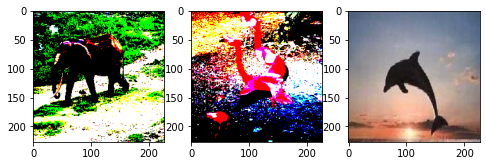

In [ ]:
fig, ax = plt.subplots(1,3, figsize = (8,4))
ax[0].imshow(x_A[1])
ax[1].imshow(x_B[2])
ax[2].imshow(x_D[2])
plt.show()

In [ ]:
# Create a sequential model
model = Sequential()

# 1st Convolutional Layer
model.add(Conv2D(filters=96, input_shape=(227,227,3), kernel_size=(11,11),\
 strides=(4,4), padding='valid'))
model.add(Activation('relu'))
# Pooling 
model.add(MaxPooling2D(pool_size=(2,2), strides=(2,2), padding='valid'))
# Batch Normalisation before passing it to the next layer
model.add(BatchNormalization())

# 2nd Convolutional Layer
model.add(Conv2D(filters=256, kernel_size=(11,11), strides=(1,1), padding='valid'))
model.add(Activation('relu'))
# Pooling
model.add(MaxPooling2D(pool_size=(2,2), strides=(2,2), padding='valid'))
# Batch Normalisation
model.add(BatchNormalization())

# 3rd Convolutional Layer
model.add(Conv2D(filters=384, kernel_size=(3,3), strides=(1,1), padding='valid'))
model.add(Activation('relu'))
# Batch Normalisation
model.add(BatchNormalization())

# 4th Convolutional Layer
model.add(Conv2D(filters=384, kernel_size=(3,3), strides=(1,1), padding='valid'))
model.add(Activation('relu'))
# Batch Normalisation
model.add(BatchNormalization())

# 5th Convolutional Layer
model.add(Conv2D(filters=256, kernel_size=(3,3), strides=(1,1), padding='valid'))
model.add(Activation('relu'))
# Pooling
model.add(MaxPooling2D(pool_size=(2,2), strides=(2,2), padding='valid'))
# Batch Normalisation
model.add(BatchNormalization())

# Passing it to a dense layer
model.add(Flatten())
# 1st Dense Layer
model.add(Dense(4096, input_shape=(227*227*3,)))
model.add(Activation('relu'))
# Add Dropout to prevent overfitting
model.add(Dropout(0.5))
# Batch Normalisation
model.add(BatchNormalization())

# 2nd Dense Layer
model.add(Dense(4096))
model.add(Activation('relu'))
# Add Dropout
model.add(Dropout(0.5))
# Batch Normalisation
model.add(BatchNormalization())

# 3rd Dense Layer
model.add(Dense(1000))
model.add(Activation('relu'))
# Add Dropout
model.add(Dropout(0.5))
# Batch Normalisation
model.add(BatchNormalization())

# Output Layer
model.add(Dense(3))
model.add(Activation('softmax'))

#model.summary()


In [ ]:
# Compile 
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [ ]:
y_train[0].shape

(3,)

In [ ]:
imageDataGenerator = ImageDataGenerator(
                                        fill_mode='nearest',
                                        horizontal_flip=True,
                                        vertical_flip=True,
                                        validation_split=0.1
                                       )

In [ ]:
batch_size = 32
# Training the data
hst = model.fit(imageDataGenerator.flow(x_train, y_train, batch_size=batch_size, subset='training'),
    validation_data=imageDataGenerator.flow(x_train, y_train, batch_size=batch_size, subset='validation'), 
    steps_per_epoch=len(x_train) // batch_size, epochs=20, shuffle=True)

Epoch 1/20
5/5 [==============================] - 20s 1s/step - loss: 1.2703 - accuracy: 0.4448 - val_loss: 3.9671 - val_accuracy: 0.0000e+00
Epoch 2/20
5/5 [==============================] - 0s 40ms/step - loss: 0.6993 - accuracy: 0.7998 - val_loss: 75.7341 - val_accuracy: 0.0000e+00
Epoch 3/20
5/5 [==============================] - 0s 36ms/step - loss: 0.6165 - accuracy: 0.8352 - val_loss: 141.2574 - val_accuracy: 0.0000e+00
Epoch 4/20
5/5 [==============================] - 0s 63ms/step - loss: 0.4874 - accuracy: 0.9011 - val_loss: 0.0000e+00 - val_accuracy: 1.0000
Epoch 5/20
5/5 [==============================] - 0s 39ms/step - loss: 0.3598 - accuracy: 0.8844 - val_loss: 7.0123e-09 - val_accuracy: 1.0000
Epoch 6/20
5/5 [==============================] - 0s 36ms/step - loss: 0.4626 - accuracy: 0.8741 - val_loss: 0.0000e+00 - val_accuracy: 1.0000
Epoch 7/20
5/5 [==============================] - 0s 36ms/step - loss: 0.5860 - accuracy: 0.8502 - val_loss: 0.0000e+00 - val_accuracy: 1.00

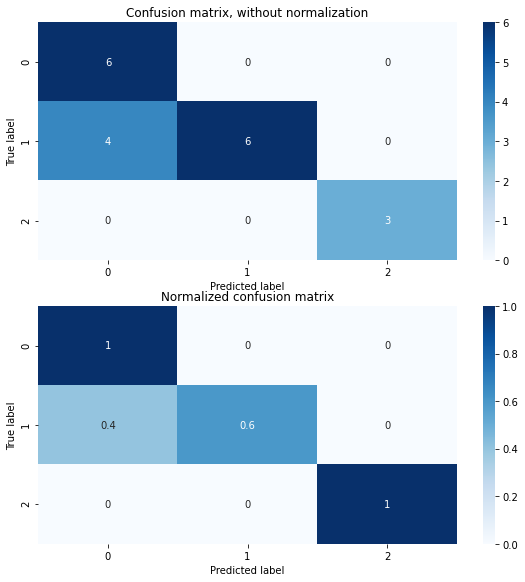

In [ ]:
#Confusion Matrix
y_pred = np.argmax(model.predict(x_test), axis=-1)

#Erzeugen der Confusion Matrix
cmat = confusion_matrix(y_test, y_pred)
cmat_norm = np.around(cmat.astype('float') / cmat.sum(axis=1)[:, np.newaxis], decimals=2)
print(y_pred)

#Initialisierung der Größe des Plots
figure = plt.figure(figsize=(4, 4))

#Plotten der Confusion Matrix mit und ohne Normalization
plt.subplot(2,1,1);
sns.heatmap(cmat, annot=True,cmap=plt.cm.Blues)
plt.tight_layout()
plt.ylabel('True label');plt.xlabel('Predicted label')
plt.title('Confusion matrix, without normalization')

plt.subplot(2,1,2)
sns.heatmap(cmat_norm, annot=True,cmap=plt.cm.Blues)
plt.tight_layout()
plt.ylabel('True label');plt.xlabel('Predicted label')
plt.title('Normalized confusion matrix')

plt.show()

In [1]:
#Anzeige der trainingsfehler über die Epochen
plt.plot(hst.hst['loss'], color = 'b')
plt.plot(hst.hst['val_loss'], color = 'r')
plt.ylabel('Loss')
plt.xlabel('Epochs')
plt.title('Trainingsfehler über die Epochen')
plt.show()

NameError: ignored

In [ ]:
#Definition einer Funktion welche nach den falsch zugeordneten Bildern sucht und diese
#dann in der variable "missclassified_outputs_indice" als liste speichert
def misclassified(test,pred):
    list_ind=[]
    for i in range (len(y_test)):
        if not (y_test[i]==y_pred[i]): #y_test und y_pred werden verglichen
            #Wenn diese nicht gleich sind, wurde das bild falsch zugeordnet
            list_ind.append(i)
    return list_ind
    
misclassified = misclassified(y_test,y_pred)

#Ausgabe der falsch zugeordneten Bilder
print(misclassified)
total = len(y_test)
print("Number of misclassified images = " + str(len(misclassified)) +' out of '+ str(total))


[1, 5, 10, 11]
Number of misclassified images = 4 out of 19


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping i

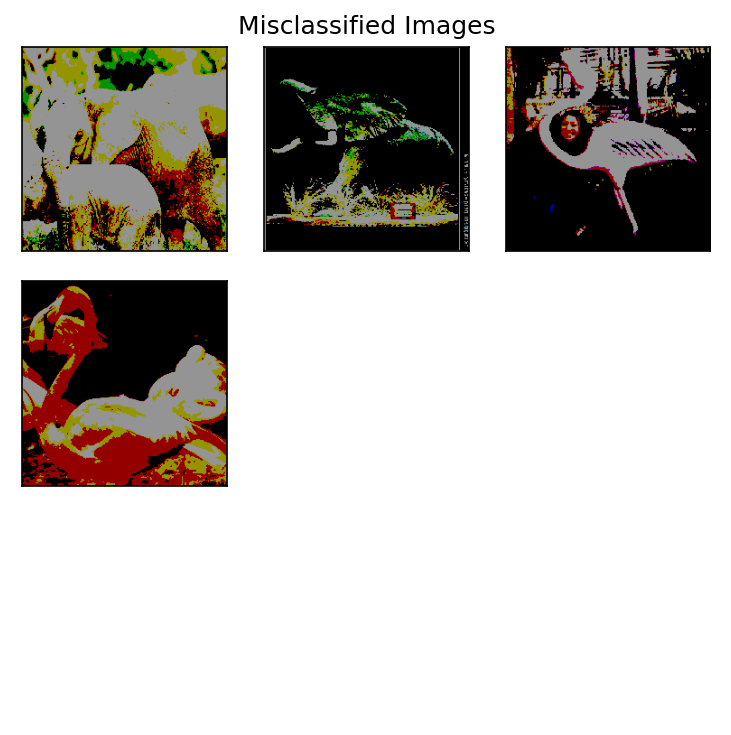

In [ ]:
#Plotting
fig, ax = plt.subplots(figsize = (5,5), dpi=150)
ax.set_title("Misclassified Images")
ax.axis("off")
image=[]
for k in misclassified:
    for i in range (len(misclassified)):
        ax = fig.add_subplot(3,3,i+1)
        ax.set_xticks([])
        ax.set_yticks([])
        image = x_test[k]
        ax.imshow(image)
        k+=1
plt.tight_layout()
plt.show()

In [ ]:
#Definition einer Funktion welche nach den richtig zugeordneten Bildern sucht und diese
#dann in der variable "classified_outputs_indice" als liste speichert
def correctly_classified(test,pred):
    list_ind=[]
    for i in range (len(y_test)):
        if (y_test[i]==y_pred[i]):
            #y_test und y_pred werden verglichen
            #Wenn diese gleich sind, wurde das bild richtig zugeordnet
            list_ind.append(i)
    return list_ind

correctly_classified=correctly_classified(y_test,y_pred)

#Ausgabe der richtig zugeordneten Bilder
print(correctly_classified)
total = len(y_test)
print("Number of correct classified images = " + str(len(correctly_classified)) +' out of '+ str(total))



[0, 2, 3, 4, 6, 7, 8, 9, 12, 13, 14, 15, 16, 17, 18]
Number of correct classified images = 15 out of 19


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


ValueError: num must be 1 <= num <= 9, not 10

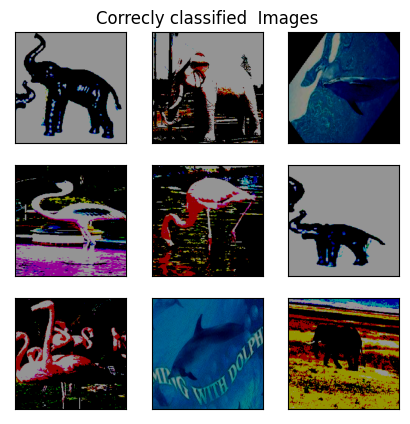

In [ ]:
fig, ax = plt.subplots(figsize = (5,5), dpi=100, squeeze=True)
ax.set_title("Correctly classified  Images")
ax.axis("off")
image=[]
for k in correctly_classified :
    for i in range (len(correctly_classified)):
        ax = fig.add_subplot(3,3,i+1)
        ax.set_xticks([])
        ax.set_yticks([])
        image = x_test[k]
        ax.imshow(image)
        k+=1
plt.show()